# Provision

In [1]:
from blocksnet import City, Provision, ProvisionMethod

city = City.from_pickle('../data/model.pickle')

In [2]:
provision = Provision(city_model=city)
service_type = city['school']
result = provision.calculate(service_type, method=ProvisionMethod.GRAVITATIONAL)

2024-12-08 14:42:57.763 | INFO     | blocksnet.method.provision:_lp_provision:321 - Setting an LP problem for accessibility = 15 : 4591x565
2024-12-08 14:43:21.842 | INFO     | blocksnet.method.provision:_lp_provision:355 - Solving the problem
2024-12-08 14:43:22.573 | INFO     | blocksnet.method.provision:_lp_provision:359 - Restoring values from variables
2024-12-08 14:43:24.215 | INFO     | blocksnet.method.provision:_lp_provision:321 - Setting an LP problem for accessibility = 30 : 2447x69
2024-12-08 14:43:25.777 | INFO     | blocksnet.method.provision:_lp_provision:355 - Solving the problem
2024-12-08 14:43:25.857 | INFO     | blocksnet.method.provision:_lp_provision:359 - Restoring values from variables
2024-12-08 14:43:26.192 | INFO     | blocksnet.method.provision:_lp_provision:321 - Setting an LP problem for accessibility = 45 : 1883x10
2024-12-08 14:43:26.393 | INFO     | blocksnet.method.provision:_lp_provision:355 - Solving the problem
2024-12-08 14:43:26.421 | INFO     | b

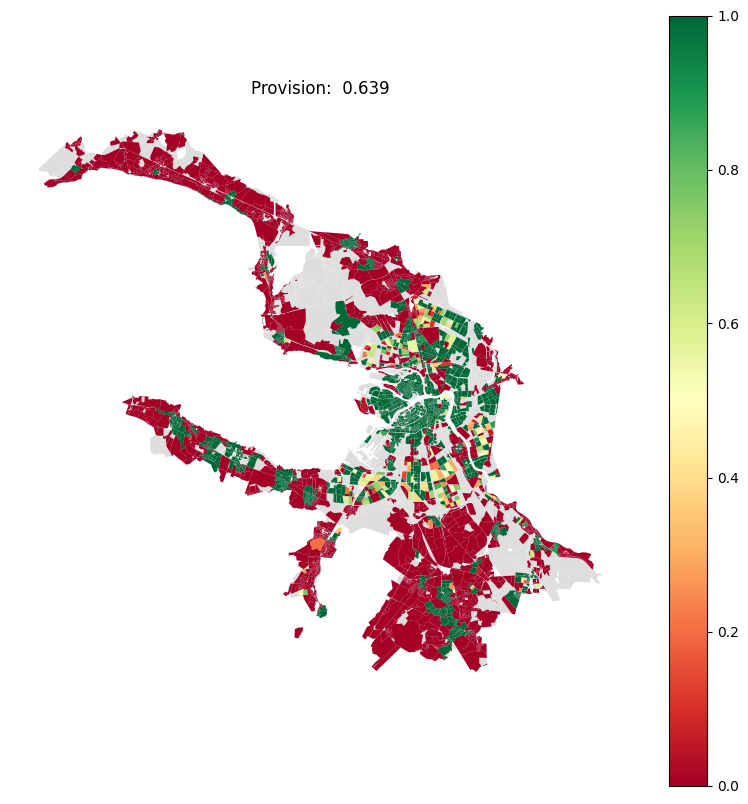

In [3]:
provision.plot(result, figsize=(10,10))

## Update scenario

In [12]:
import pandas as pd

update = {
  1357: {
    'school': 2000
  }
}

update_df = pd.DataFrame.from_dict(update, 'index')
update_df

,school
1357,2000


In [13]:
upd_result = provision.calculate(service_type, update_df)

2024-12-08 14:45:20.784 | INFO     | blocksnet.method.provision:_lp_provision:321 - Setting an LP problem for accessibility = 15 : 4591x566
2024-12-08 14:45:44.946 | INFO     | blocksnet.method.provision:_lp_provision:355 - Solving the problem
2024-12-08 14:45:45.704 | INFO     | blocksnet.method.provision:_lp_provision:359 - Restoring values from variables
2024-12-08 14:45:47.357 | INFO     | blocksnet.method.provision:_lp_provision:321 - Setting an LP problem for accessibility = 30 : 2446x70
2024-12-08 14:45:49.027 | INFO     | blocksnet.method.provision:_lp_provision:355 - Solving the problem
2024-12-08 14:45:49.108 | INFO     | blocksnet.method.provision:_lp_provision:359 - Restoring values from variables
2024-12-08 14:45:49.451 | INFO     | blocksnet.method.provision:_lp_provision:321 - Setting an LP problem for accessibility = 45 : 1869x11
2024-12-08 14:45:49.677 | INFO     | blocksnet.method.provision:_lp_provision:355 - Solving the problem
2024-12-08 14:45:49.704 | INFO     | b

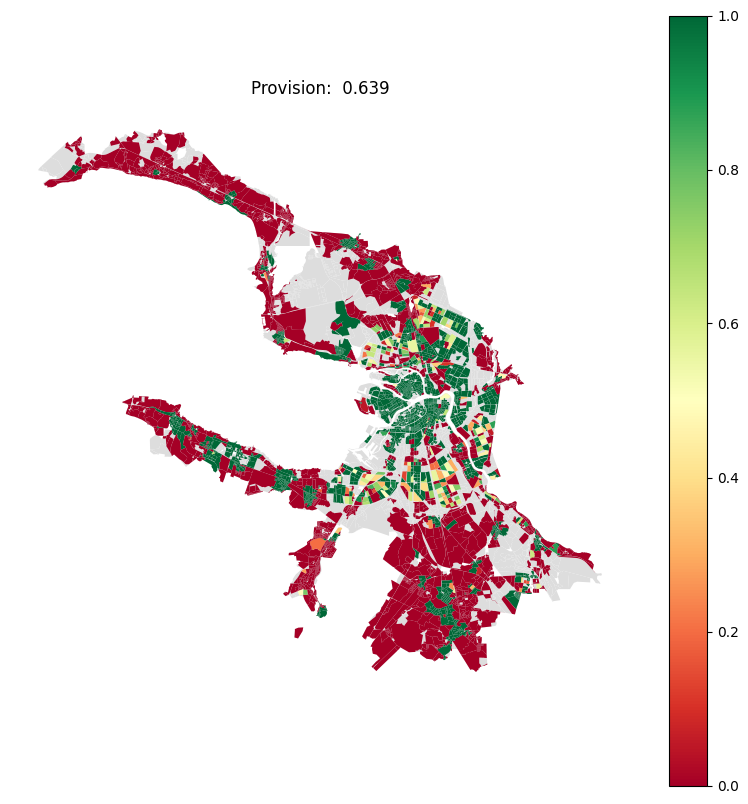

In [14]:
provision.plot(upd_result, figsize=(10,10))

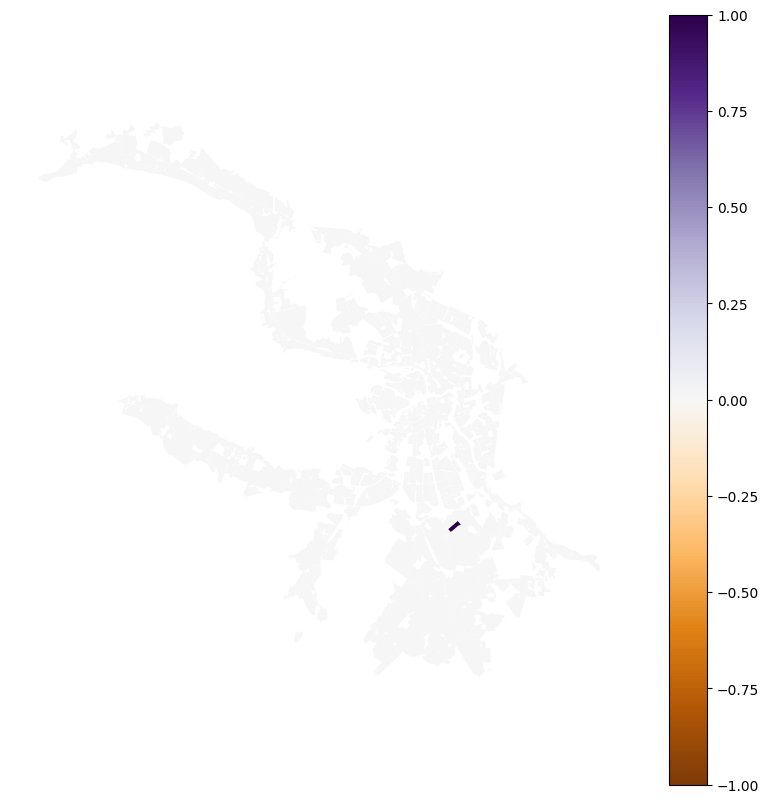

In [15]:
delta_result = upd_result.copy()
delta_result['provision'] -= result['provision']
delta_result.plot(
  column='provision', 
  vmin=-1, 
  vmax=1, 
  legend=True, 
  linewidth=0.1, 
  figsize=(10,10),
  cmap="PuOr"
).set_axis_off()

## Some utilities

Statistics to help user understand the results

In [16]:
provision.stat(result)

{'mean': 0.4926027103251904,
 'median': 0.37388724035608306,
 'min': 0.0,
 'max': 1.0}

Overall provision assessment

In [17]:
provision.total(result)

0.6390092565275114

Lower and upper bounds of possible provision assessment based on blocks capacities and demands

In [18]:
provision.get_bounds(service_type)

(0.3889247430791169, 0.6996023258100998)